In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

# Loading the data

In [661]:
df = pd.read_csv("sales.csv")
pd.set_option('display.max_columns', None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [662]:
df.shape

(7109, 22)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# DATA CLEANING

In [664]:
df.AREA.value_counts().index

Index(['Chrompet', 'Karapakkam', 'KK Nagar', 'Velachery', 'Anna Nagar',
       'Adyar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Chormpet', 'TNagar',
       'Karapakam', 'Ana Nagar', 'Velchery', 'Ann Nagar', 'Adyr', 'KKNagar'],
      dtype='object')

In [665]:
#df.AREA------>this feature contains many misspelled entries and we have to replace them with correct entry.

In [666]:
a=["Chrompt","Chormpet","Chrmpet","TNagar","Adyr","Ann Nagar","Ana Nagar","Karapakam","Velchery","KKNagar"]
b=["Chrompet","Chrompet","Chrompet","T Nagar","Adyar","Anna Nagar","Anna Nagar","Karapakkam","Velachery","KK Nagar"]

In [667]:
df.AREA = df.AREA.replace(a,b)

In [668]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [669]:
#checking df.UTILITY_AVAIL feature for misspelled words

In [670]:
df.UTILITY_AVAIL.value_counts().index

Index(['AllPub', 'NoSeWa', 'NoSewr ', 'ELO', 'All Pub'], dtype='object')

In [671]:
#replacing the entries.

In [672]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.replace(["All Pub","NoSewr "],["AllPub","NoSewr"])

In [673]:
df.UTILITY_AVAIL.value_counts().index

Index(['AllPub', 'NoSeWa', 'NoSewr', 'ELO'], dtype='object')

In [674]:
#checking df.BUILDTYPE feature for misspelled words

In [675]:
df.BUILDTYPE.value_counts().index

Index(['House', 'Commercial', 'Others', 'Other', 'Comercial'], dtype='object')

In [676]:
#replacing the entries.

In [677]:
df.BUILDTYPE=df.BUILDTYPE.replace(["Other","Comercial"],["Commercial","Others"])

In [678]:
df.BUILDTYPE.value_counts().index

Index(['House', 'Commercial', 'Others'], dtype='object')

In [679]:
#checking df.SALE_COND feature for misspelled words

In [680]:
df.SALE_COND.value_counts().index

Index(['AdjLand', 'Partial', 'Normal Sale', 'AbNormal', 'Family', 'Adj Land',
       'Ab Normal', 'Partiall', 'PartiaLl'],
      dtype='object')

In [681]:
#replacing the entries

In [682]:
df.SALE_COND=df.SALE_COND.replace(["Adj Land","Partiall","PartiaLl","Ab Normal"],["AdjLand","Partial","Partial","AbNormal"])

In [683]:
df.SALE_COND.value_counts().index

Index(['AdjLand', 'Partial', 'Normal Sale', 'AbNormal', 'Family'], dtype='object')

In [684]:
#checking df.SALE_COND feature for misspelled words

In [685]:
df.STREET.value_counts().index

Index(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype='object')

In [686]:
#replacing the entries...

In [687]:
df.STREET=df.STREET.replace(["Pavd","NoAccess"],["Paved","No Access"])

In [688]:
df.STREET.value_counts().index

Index(['Paved', 'Gravel', 'No Access'], dtype='object')

In [689]:
#checking df.PARK_FACIL feature for misspelled words

In [690]:
df.PARK_FACIL.value_counts().index

Index(['Yes', 'No', 'Noo'], dtype='object')

In [691]:
#replacing the entries

In [692]:
df.PARK_FACIL=df.PARK_FACIL.replace("Noo","No")

In [693]:
df.PARK_FACIL.value_counts().index

Index(['Yes', 'No'], dtype='object')

# checking for null values.

In [694]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [695]:
#null values are present in df1[N_BEDROOM,N_BATHROOM,QS_OVERALL] are very less and we can drop that rows .

In [696]:
df1=df.dropna(how ="any",axis=0)# dropping the rows having null values

In [697]:
#rechecking whether the null values are removed.

In [698]:
df1.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# changing dtypes of columns

In [699]:
# changing the dtypes of N_BEDROOM , N_BATHROOM from float to int
df1.N_BEDROOM = df1.N_BEDROOM.astype(int)
df1.N_BATHROOM = df1.N_BATHROOM.astype(int)

In [700]:
# changing the dtypes of Date columns from object to datetime format
df1.DATE_SALE = pd.to_datetime(df1.DATE_SALE, format='%d-%m-%Y')
df1.DATE_BUILD = pd.to_datetime(df1.DATE_BUILD, format='%d-%m-%Y')

In [701]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   int32         
 6   N_BATHROOM     7056 non-null   int32         
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

# Adding new columns in to our data

In [702]:
df1['property_age'] = pd.DatetimeIndex(df1.DATE_SALE).year - pd.DatetimeIndex(df1.DATE_BUILD).year
#creating an new column [property_age] which will define the property's age in years.

In [703]:
df1['total_price'] = (df1.REG_FEE+ df1.COMMIS+ df1.SALES_PRICE)

In [704]:
df1["PRICE_PER_SQFT"]=(df1["SALES_PRICE"]/df1["INT_SQFT"]).apply(lambda x:round(x,2))

In [705]:
df1.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,property_age,total_price,PRICE_PER_SQFT
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400,7569.72
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941,10935.43
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408,14476.57


In [706]:
#renaming the columns in uppercase
df1.columns = df1.columns.str.upper()

In [707]:
#rearranging the columns preferred order

In [708]:
a=['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'PRICE_PER_SQFT','sales_price', 'total_price']

In [709]:
c=[]
for i in a:
    b=i.upper()
    c.append(b)
c

['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'DATE_BUILD',
 'DATE_SALE',
 'PROPERTY_AGE',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'PRICE_PER_SQFT',
 'SALES_PRICE',
 'TOTAL_PRICE']

In [710]:
df1 = df1.reindex(columns = c)

In [711]:
# we can clearly see that the columns are rearranged in preferred manner
df1.head()

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,DATE_BUILD,DATE_SALE,PROPERTY_AGE,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,PRICE_PER_SQFT,SALES_PRICE,TOTAL_PRICE
0,P03210,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A,1967-05-15,2011-05-04,44,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7569.72,7600000,8124400
1,P09411,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH,1995-12-22,2006-12-19,11,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,10935.43,21717770,22781941
2,P01812,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL,1992-02-09,2012-02-04,20,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,14476.57,13159200,13672408
3,P05346,Velachery,Family,No,Others,NoSewr,Paved,I,1988-03-18,2010-03-13,22,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,5191.53,9630290,10063653
4,P06210,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C,1979-10-13,2009-10-05,30,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,6040.99,7406250,7717313


<AxesSubplot:>

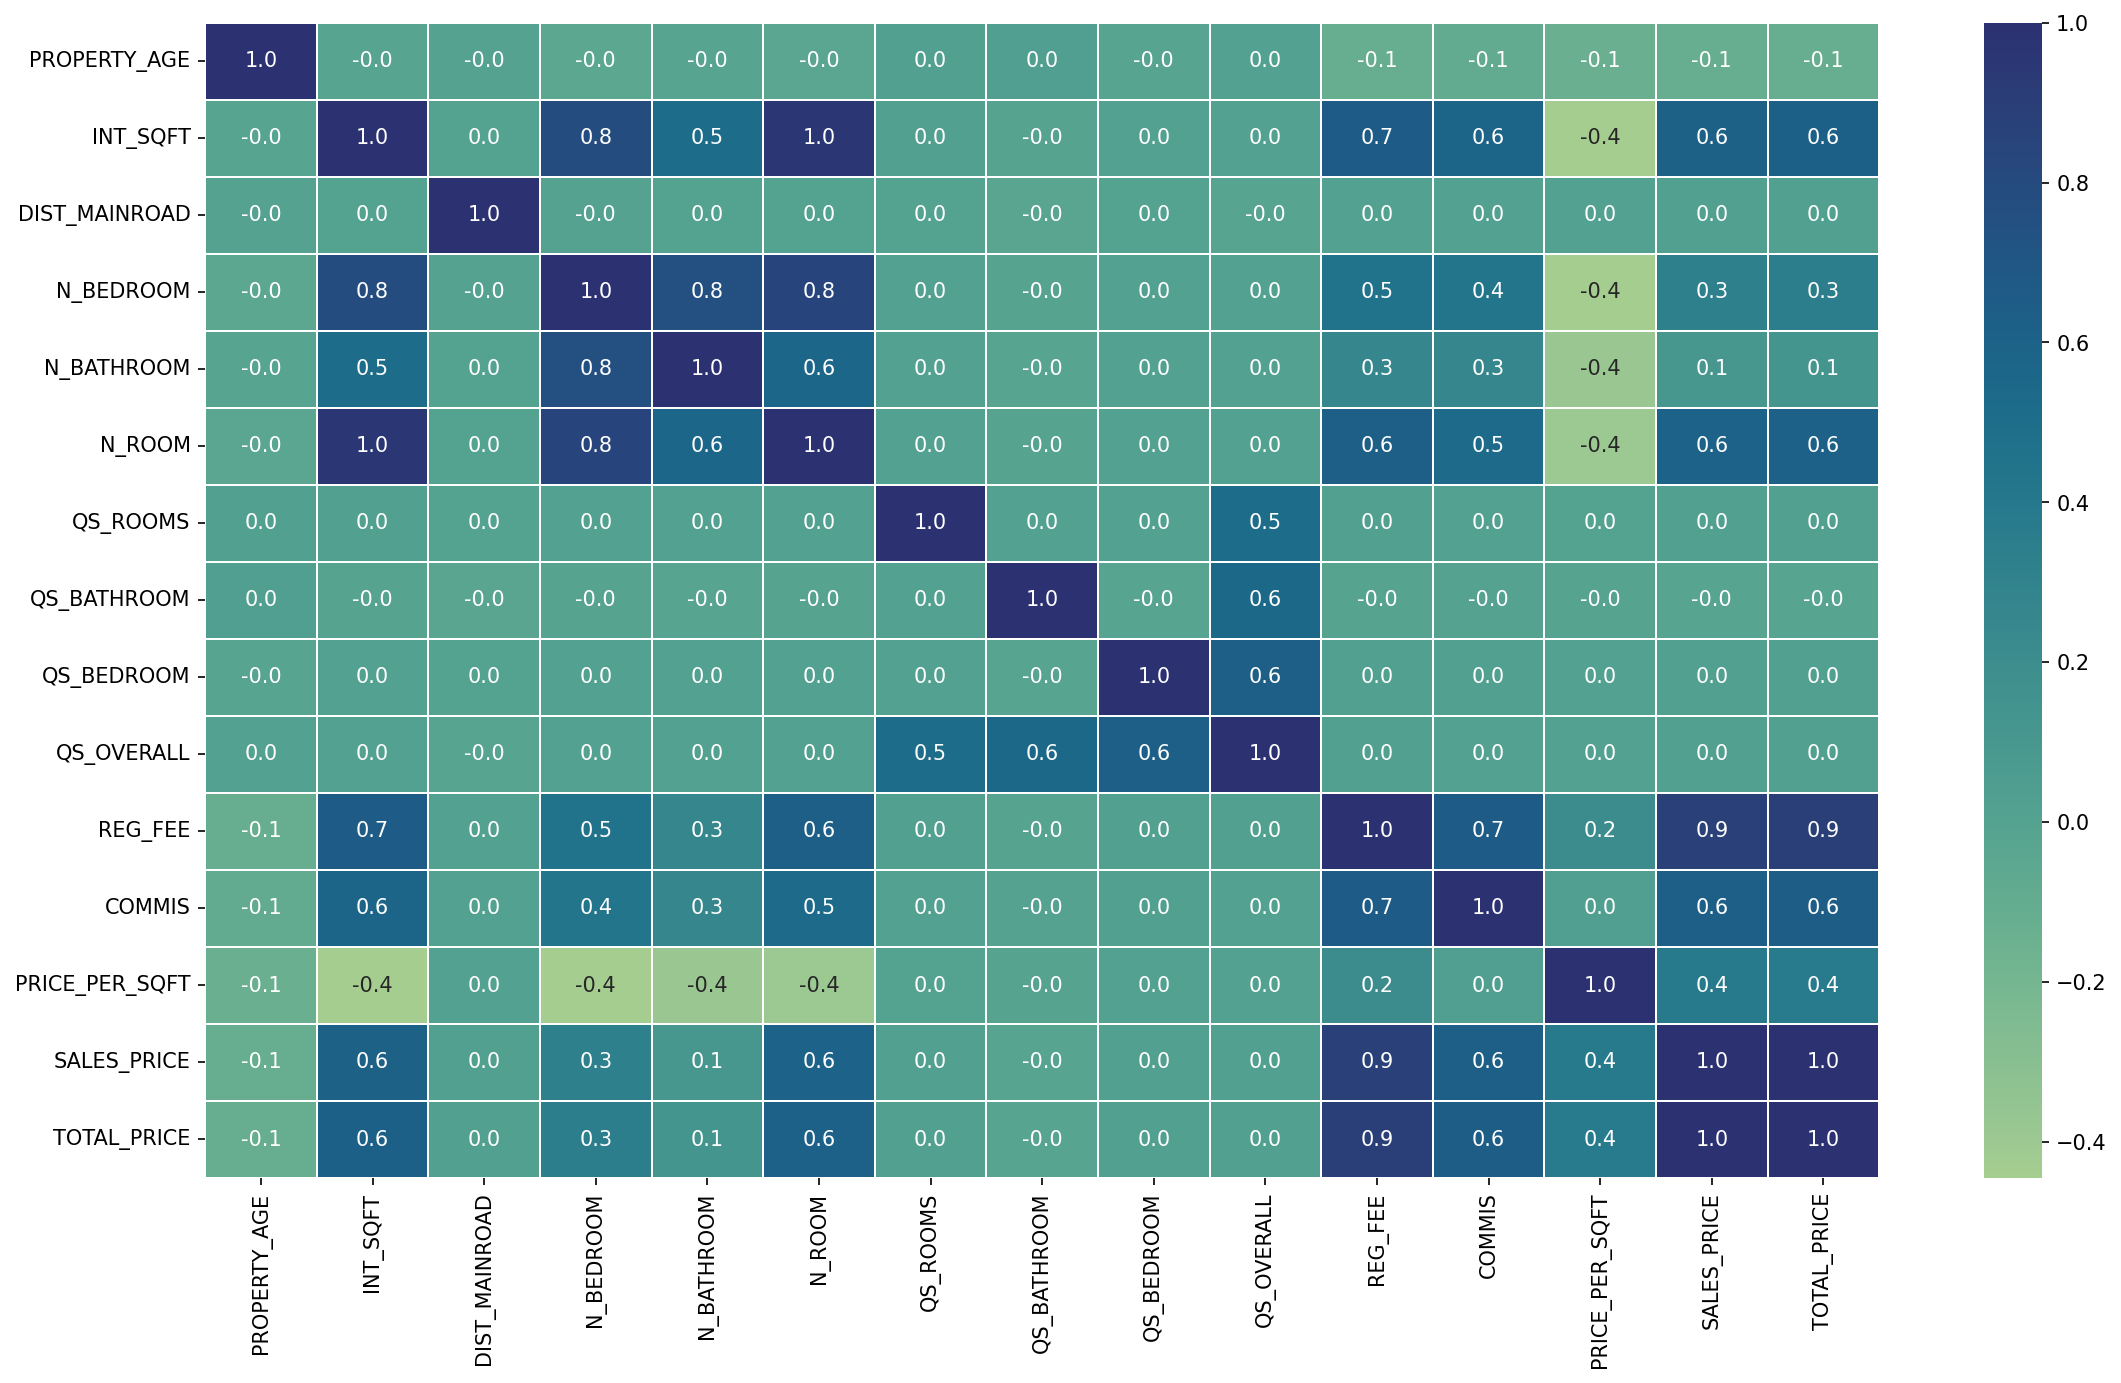

In [712]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df1.corr(method='pearson'),annot=True, fmt='.1f', linewidth=0.2, cmap="crest")

# visualization

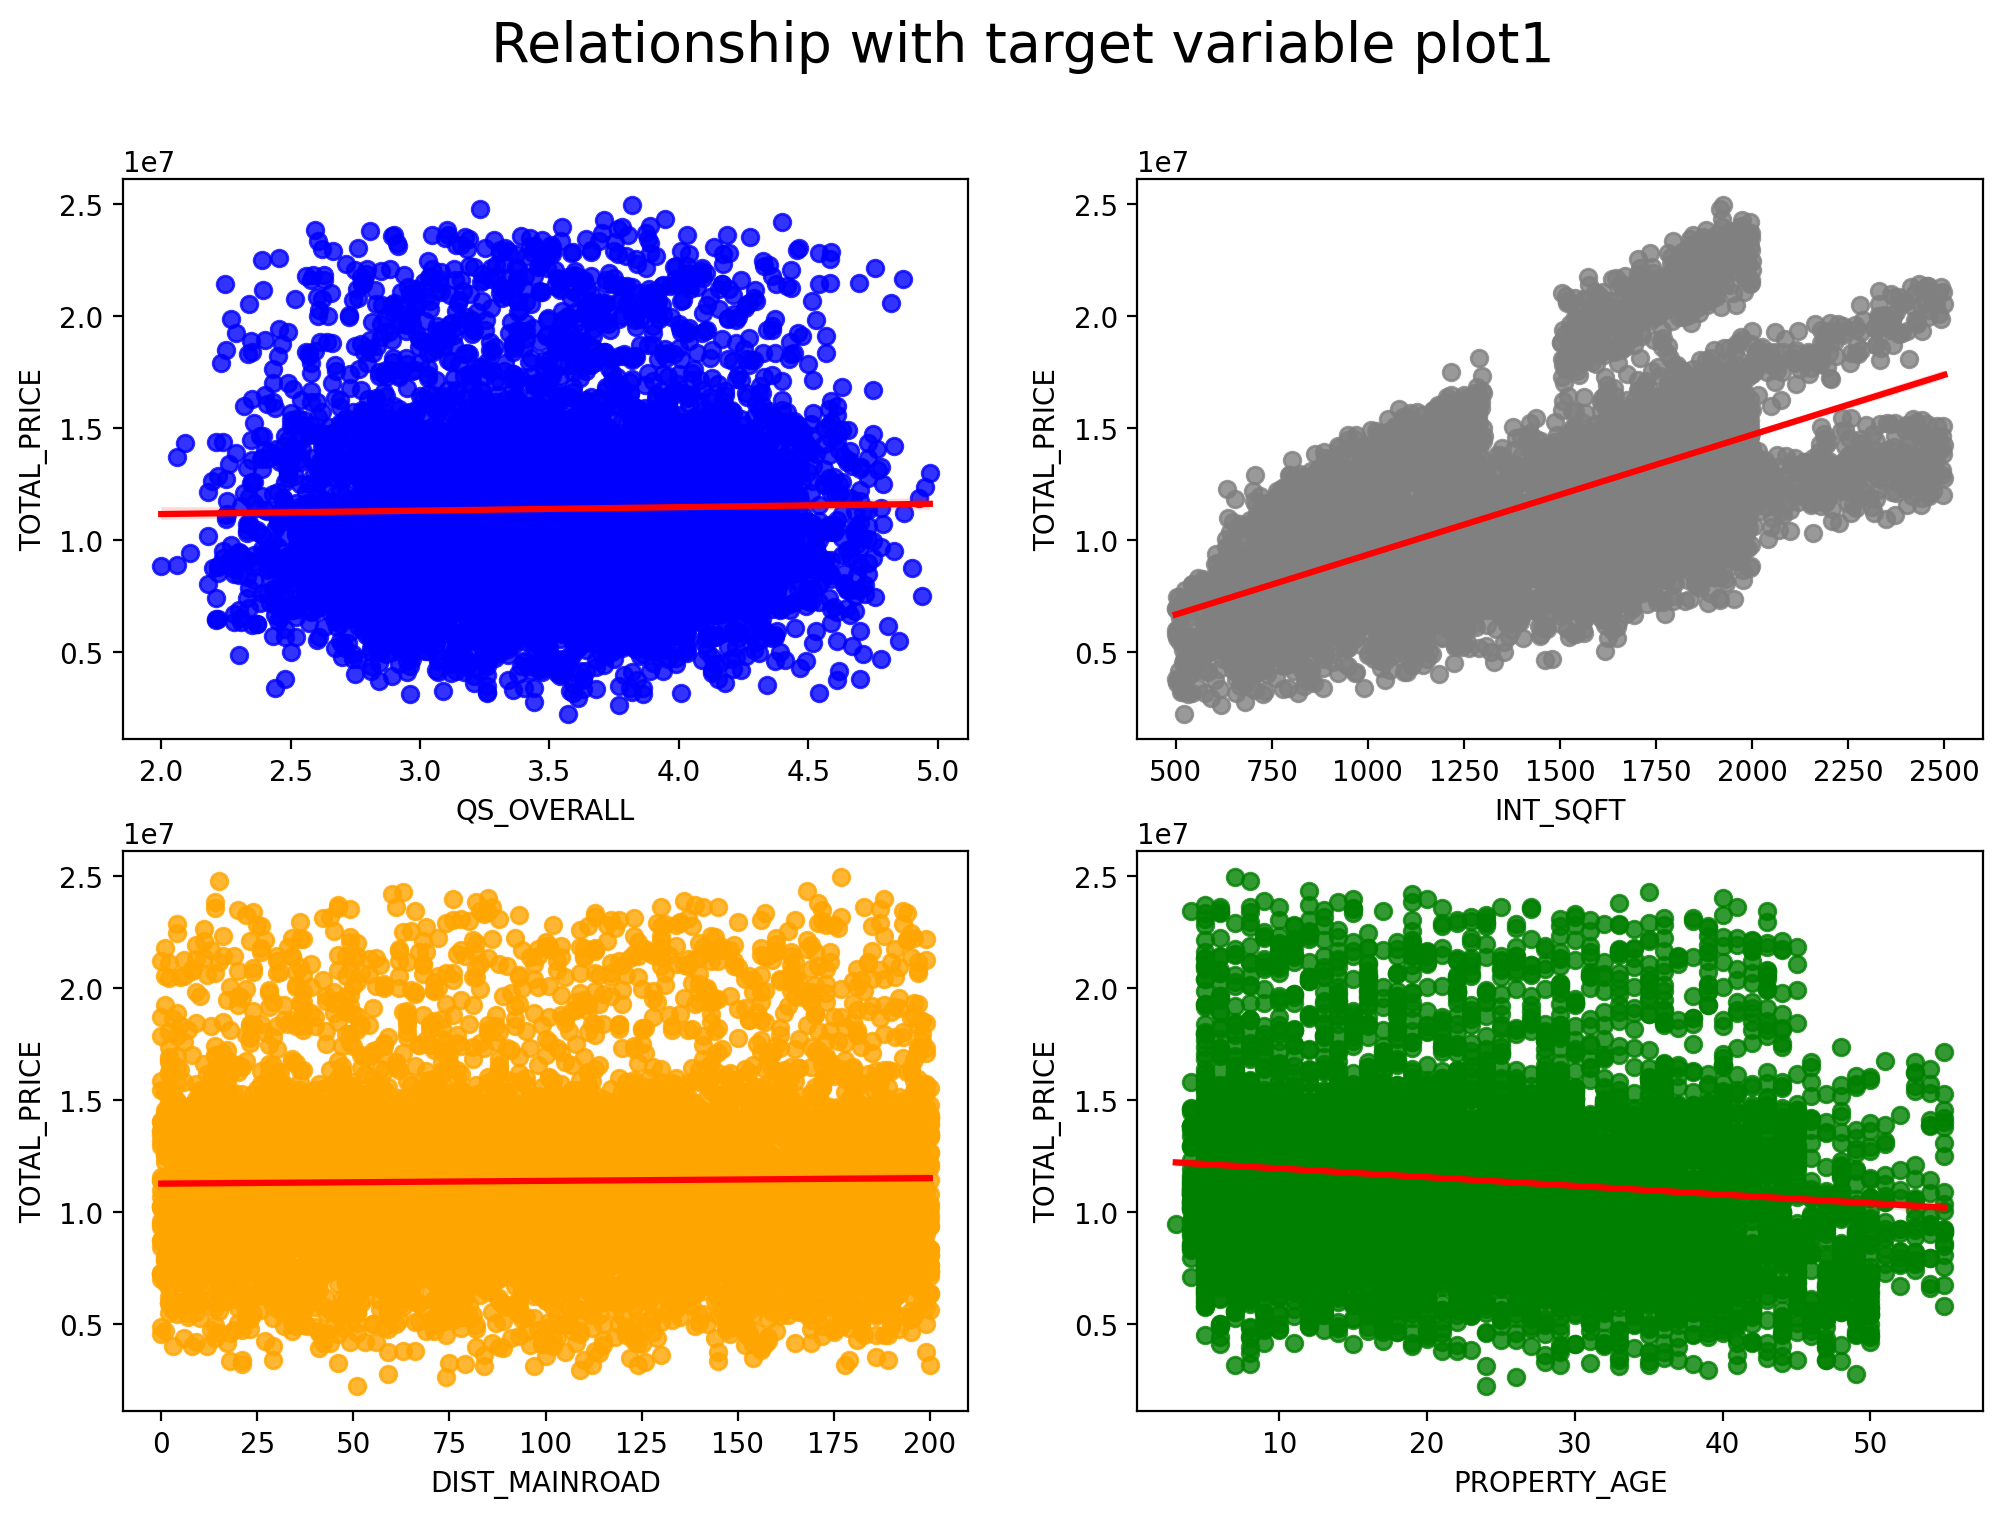

In [713]:
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2,2,1)
sns.regplot(df1.QS_OVERALL, df1.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df1.INT_SQFT, df1.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df1.DIST_MAINROAD, df1.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df1.PROPERTY_AGE, df1.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.suptitle("Relationship with target variable plot1",fontsize=20)
plt.show()


In [714]:
# summary:
# By referring to the regressionplot above we can make some decisions..
# 1.In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
# 2.In int_sqft we find good relation so this feature will be very important for us so we will keep it.
# 3.In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it
# 4.In property_age we find small relation so this feature will be useful for us so we will keep it.

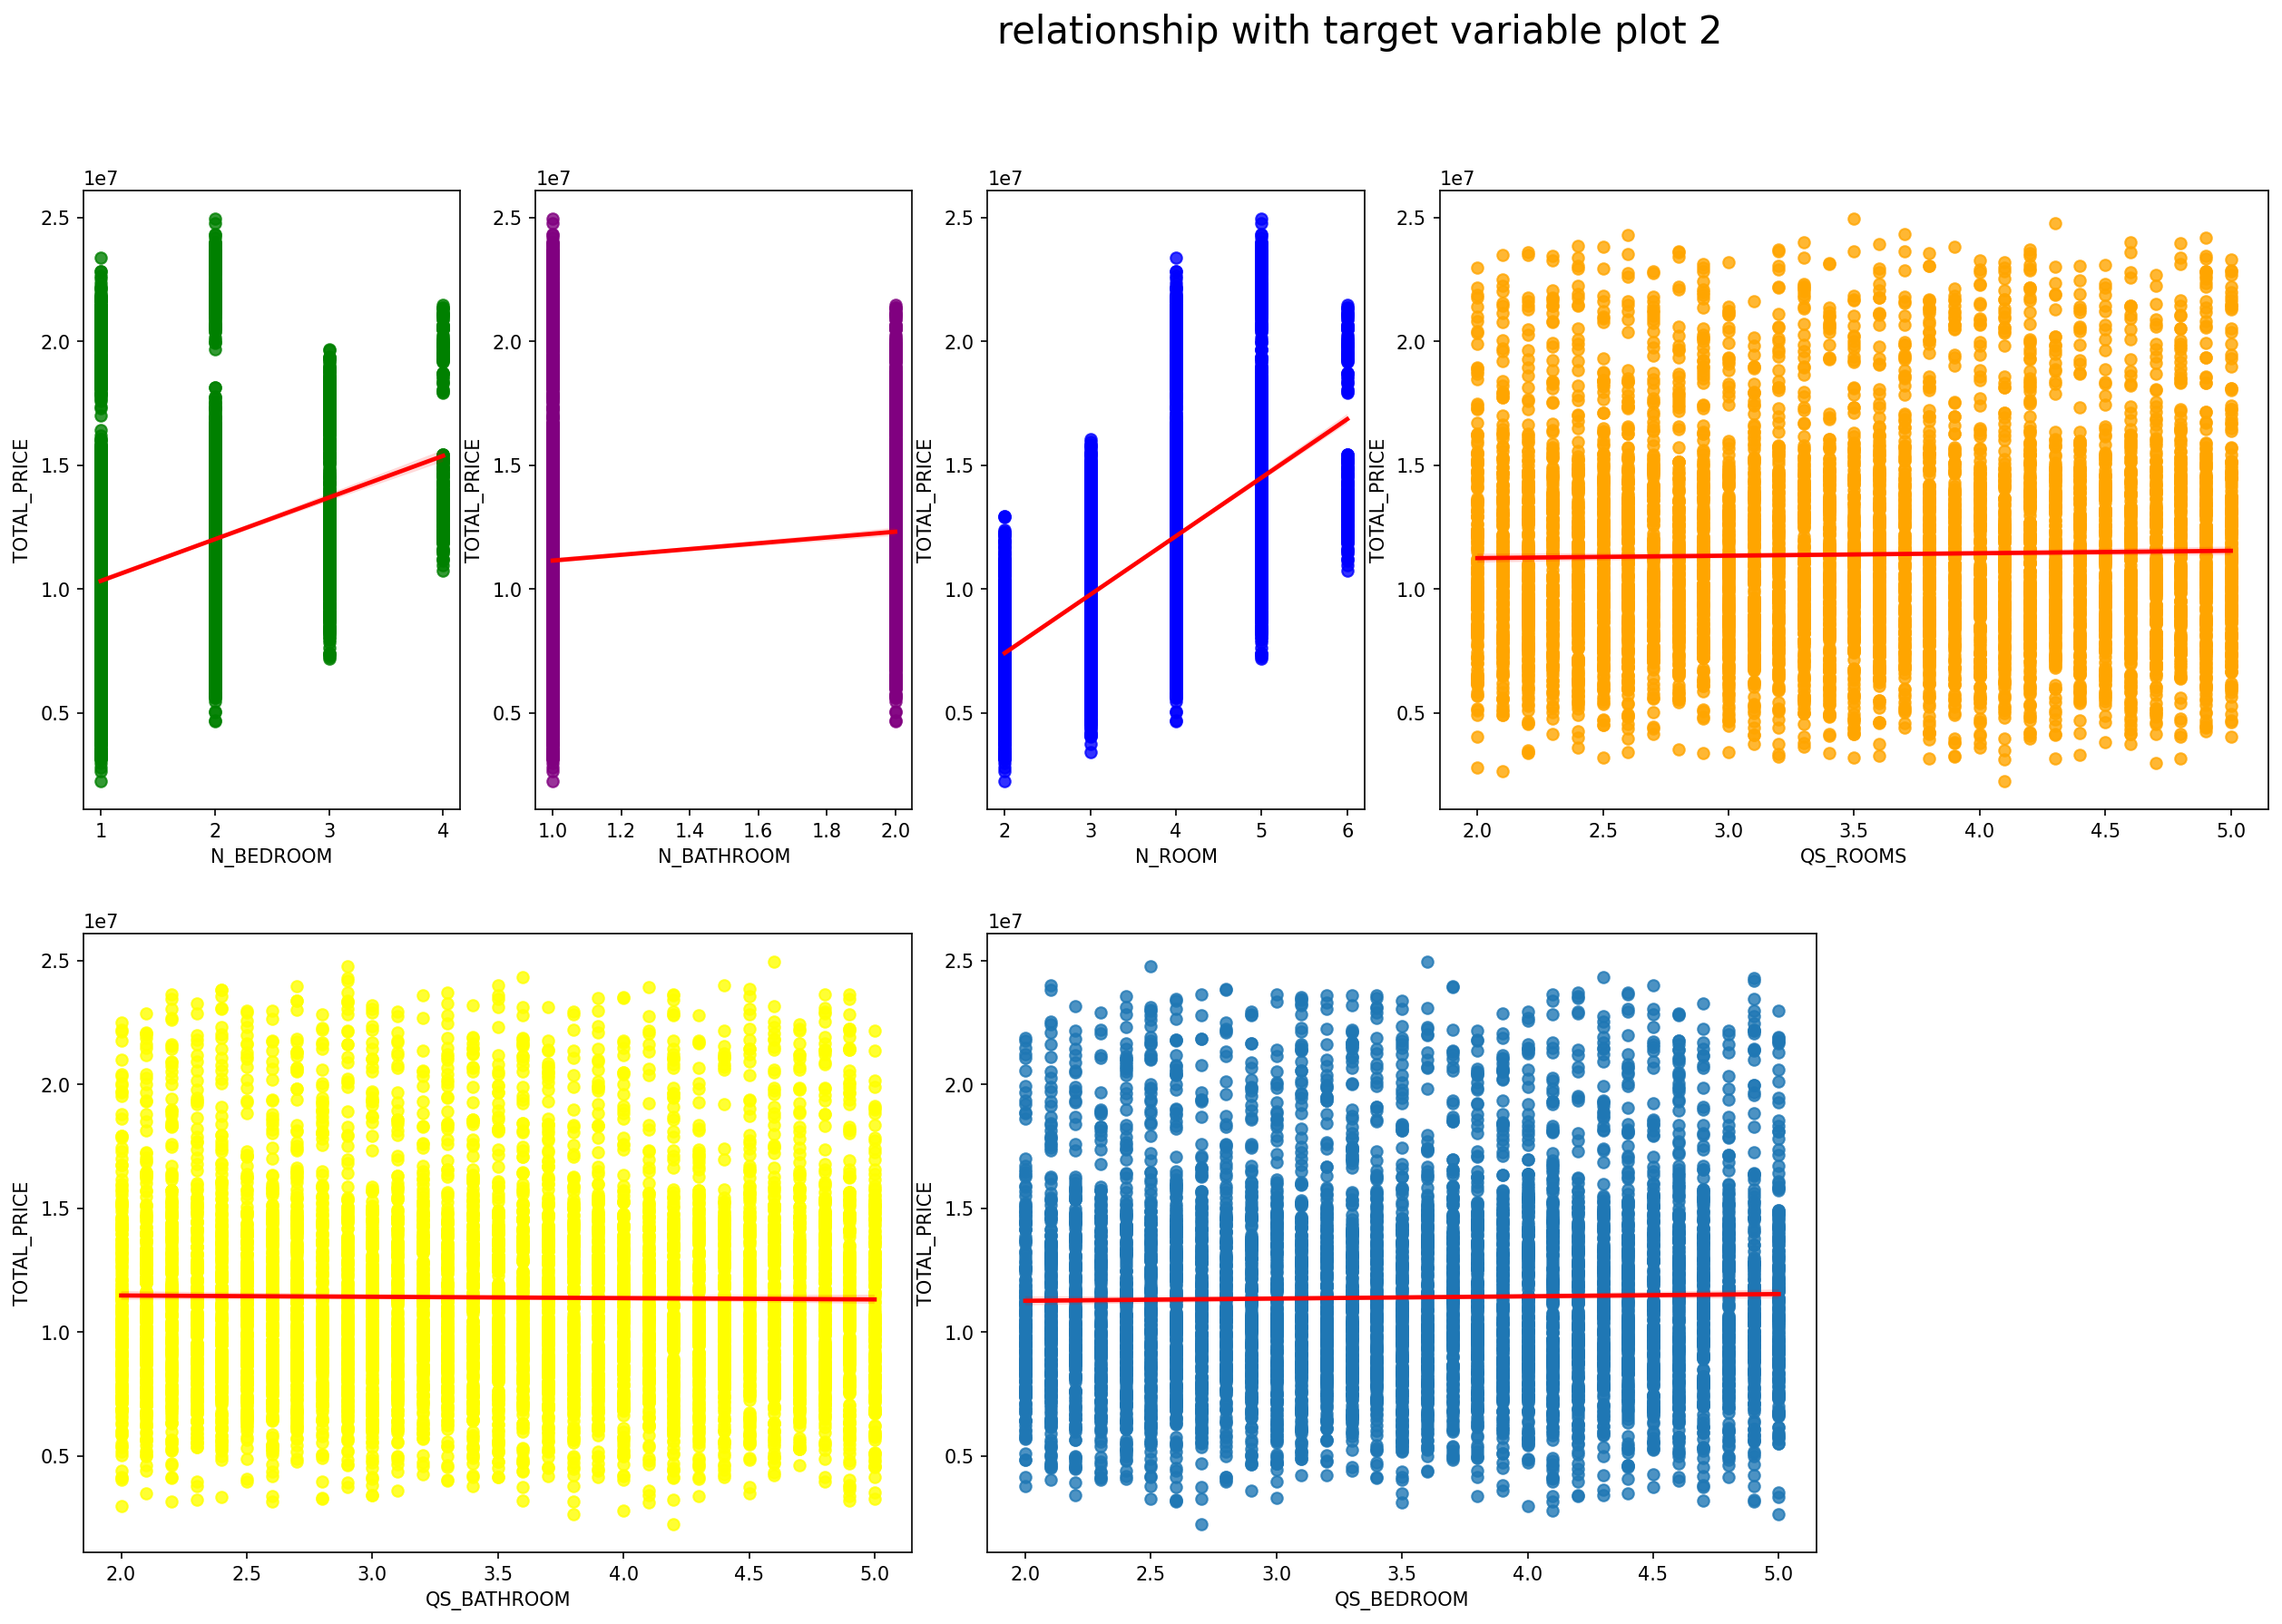

In [715]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df1.N_BEDROOM, df1.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df1.N_BATHROOM, df1.TOTAL_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df1.N_ROOM, df1.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df1.QS_ROOMS, df1.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df1.QS_BATHROOM, df1.TOTAL_PRICE, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df1.QS_BEDROOM, df1.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("relationship with target variable plot 2", fontsize=20)
plt.show()

In [716]:
# summary:-
# Here we can come to conclusion that:
# 1. In n_bedroom we find good relation so this feature will be very important for us so we will hold on to it.
# 2. In n_bathroom we find small relation so this feature will be useful for us so we will hold on to it.
# 3. In n_room we find good relation so this feature will be very important for us so we will hold on to it.
# 4. In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
# 5. In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
# 6. In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

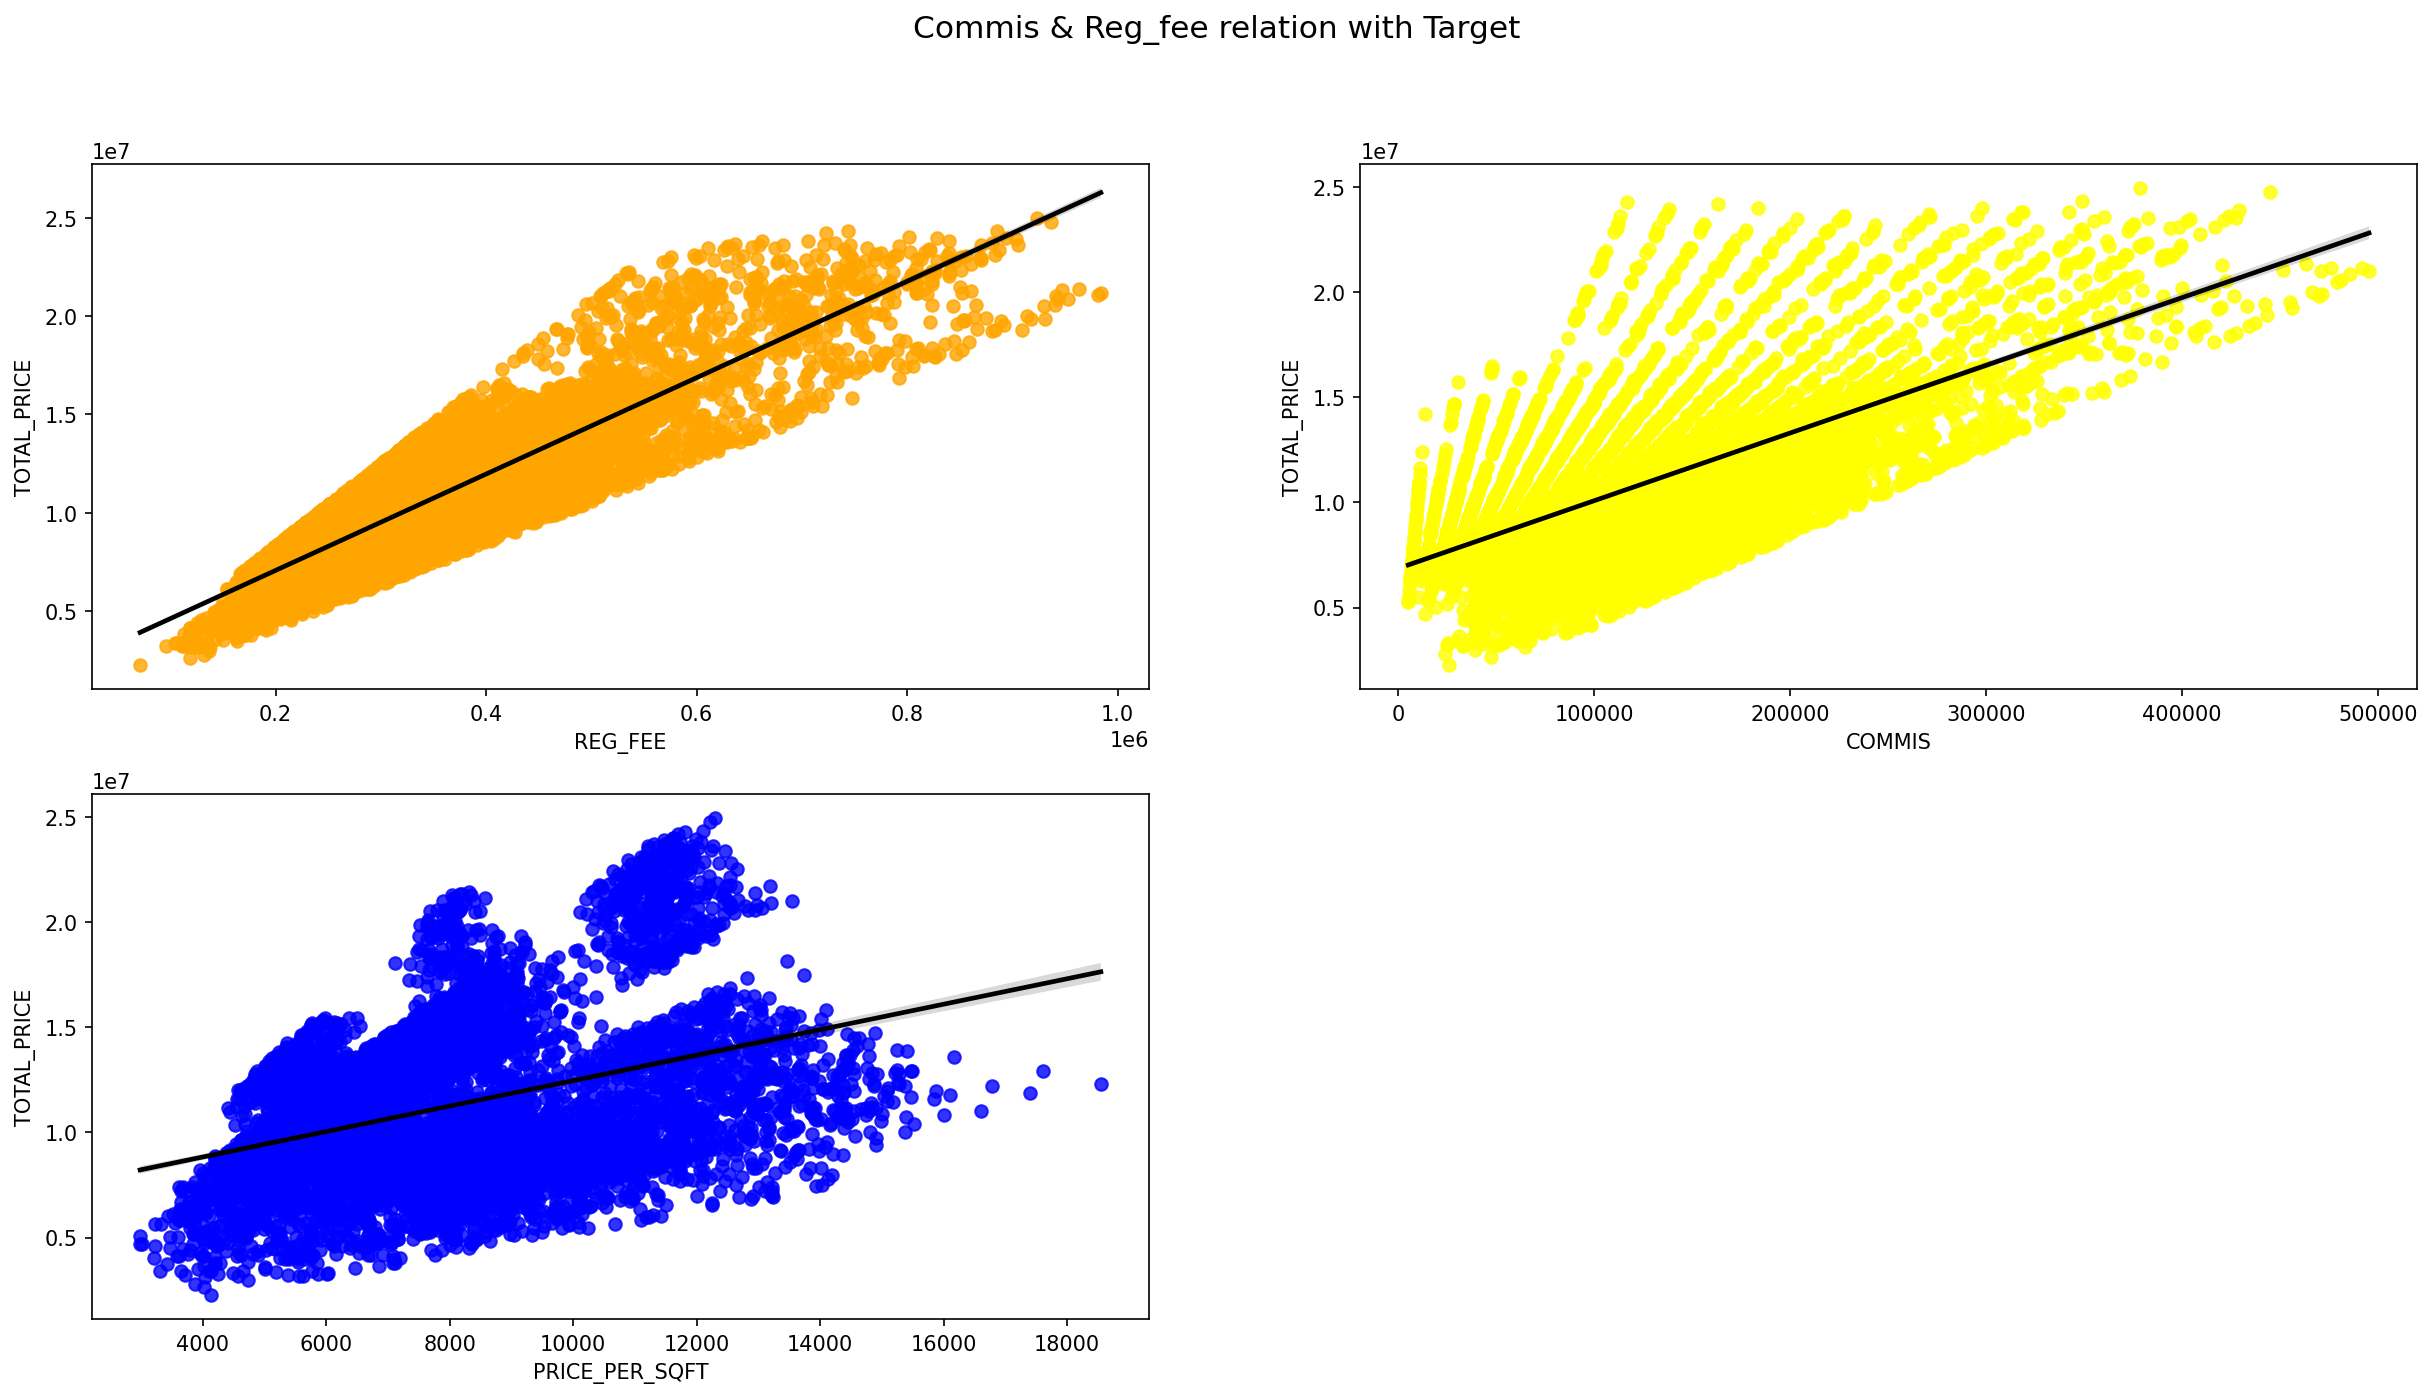

In [717]:
# we are clearv that these 2 columns are completly dependent on the target column
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df1.REG_FEE, df1.TOTAL_PRICE,scatter_kws={"color": "orange"},line_kws={"color": "black"})
plt.subplot(2,2,2)
sns.regplot(df1.COMMIS, df1.TOTAL_PRICE,scatter_kws={"color": "yellow"}, line_kws={"color": "black"})
plt.subplot(2,2,3)
sns.regplot(df1.PRICE_PER_SQFT, df1.TOTAL_PRICE,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.suptitle("Commis & Reg_fee relation with Target", fontsize=15)
plt.show()

<AxesSubplot:>

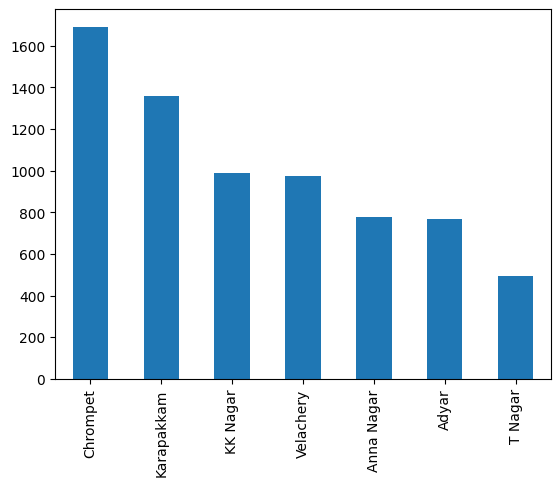

In [718]:
df1.AREA.value_counts().plot(kind="bar")

In [719]:
fig = px.scatter(df1, x="INT_SQFT", y="SALES_PRICE", color="AREA")
fig.show()

In [720]:
# 1. It is clear that kk nagar has the highest in terms of SQFT.
# 2. Tnagar and Anna nagar has the highest sales_price though it is lesser SQFT than kk nagar.

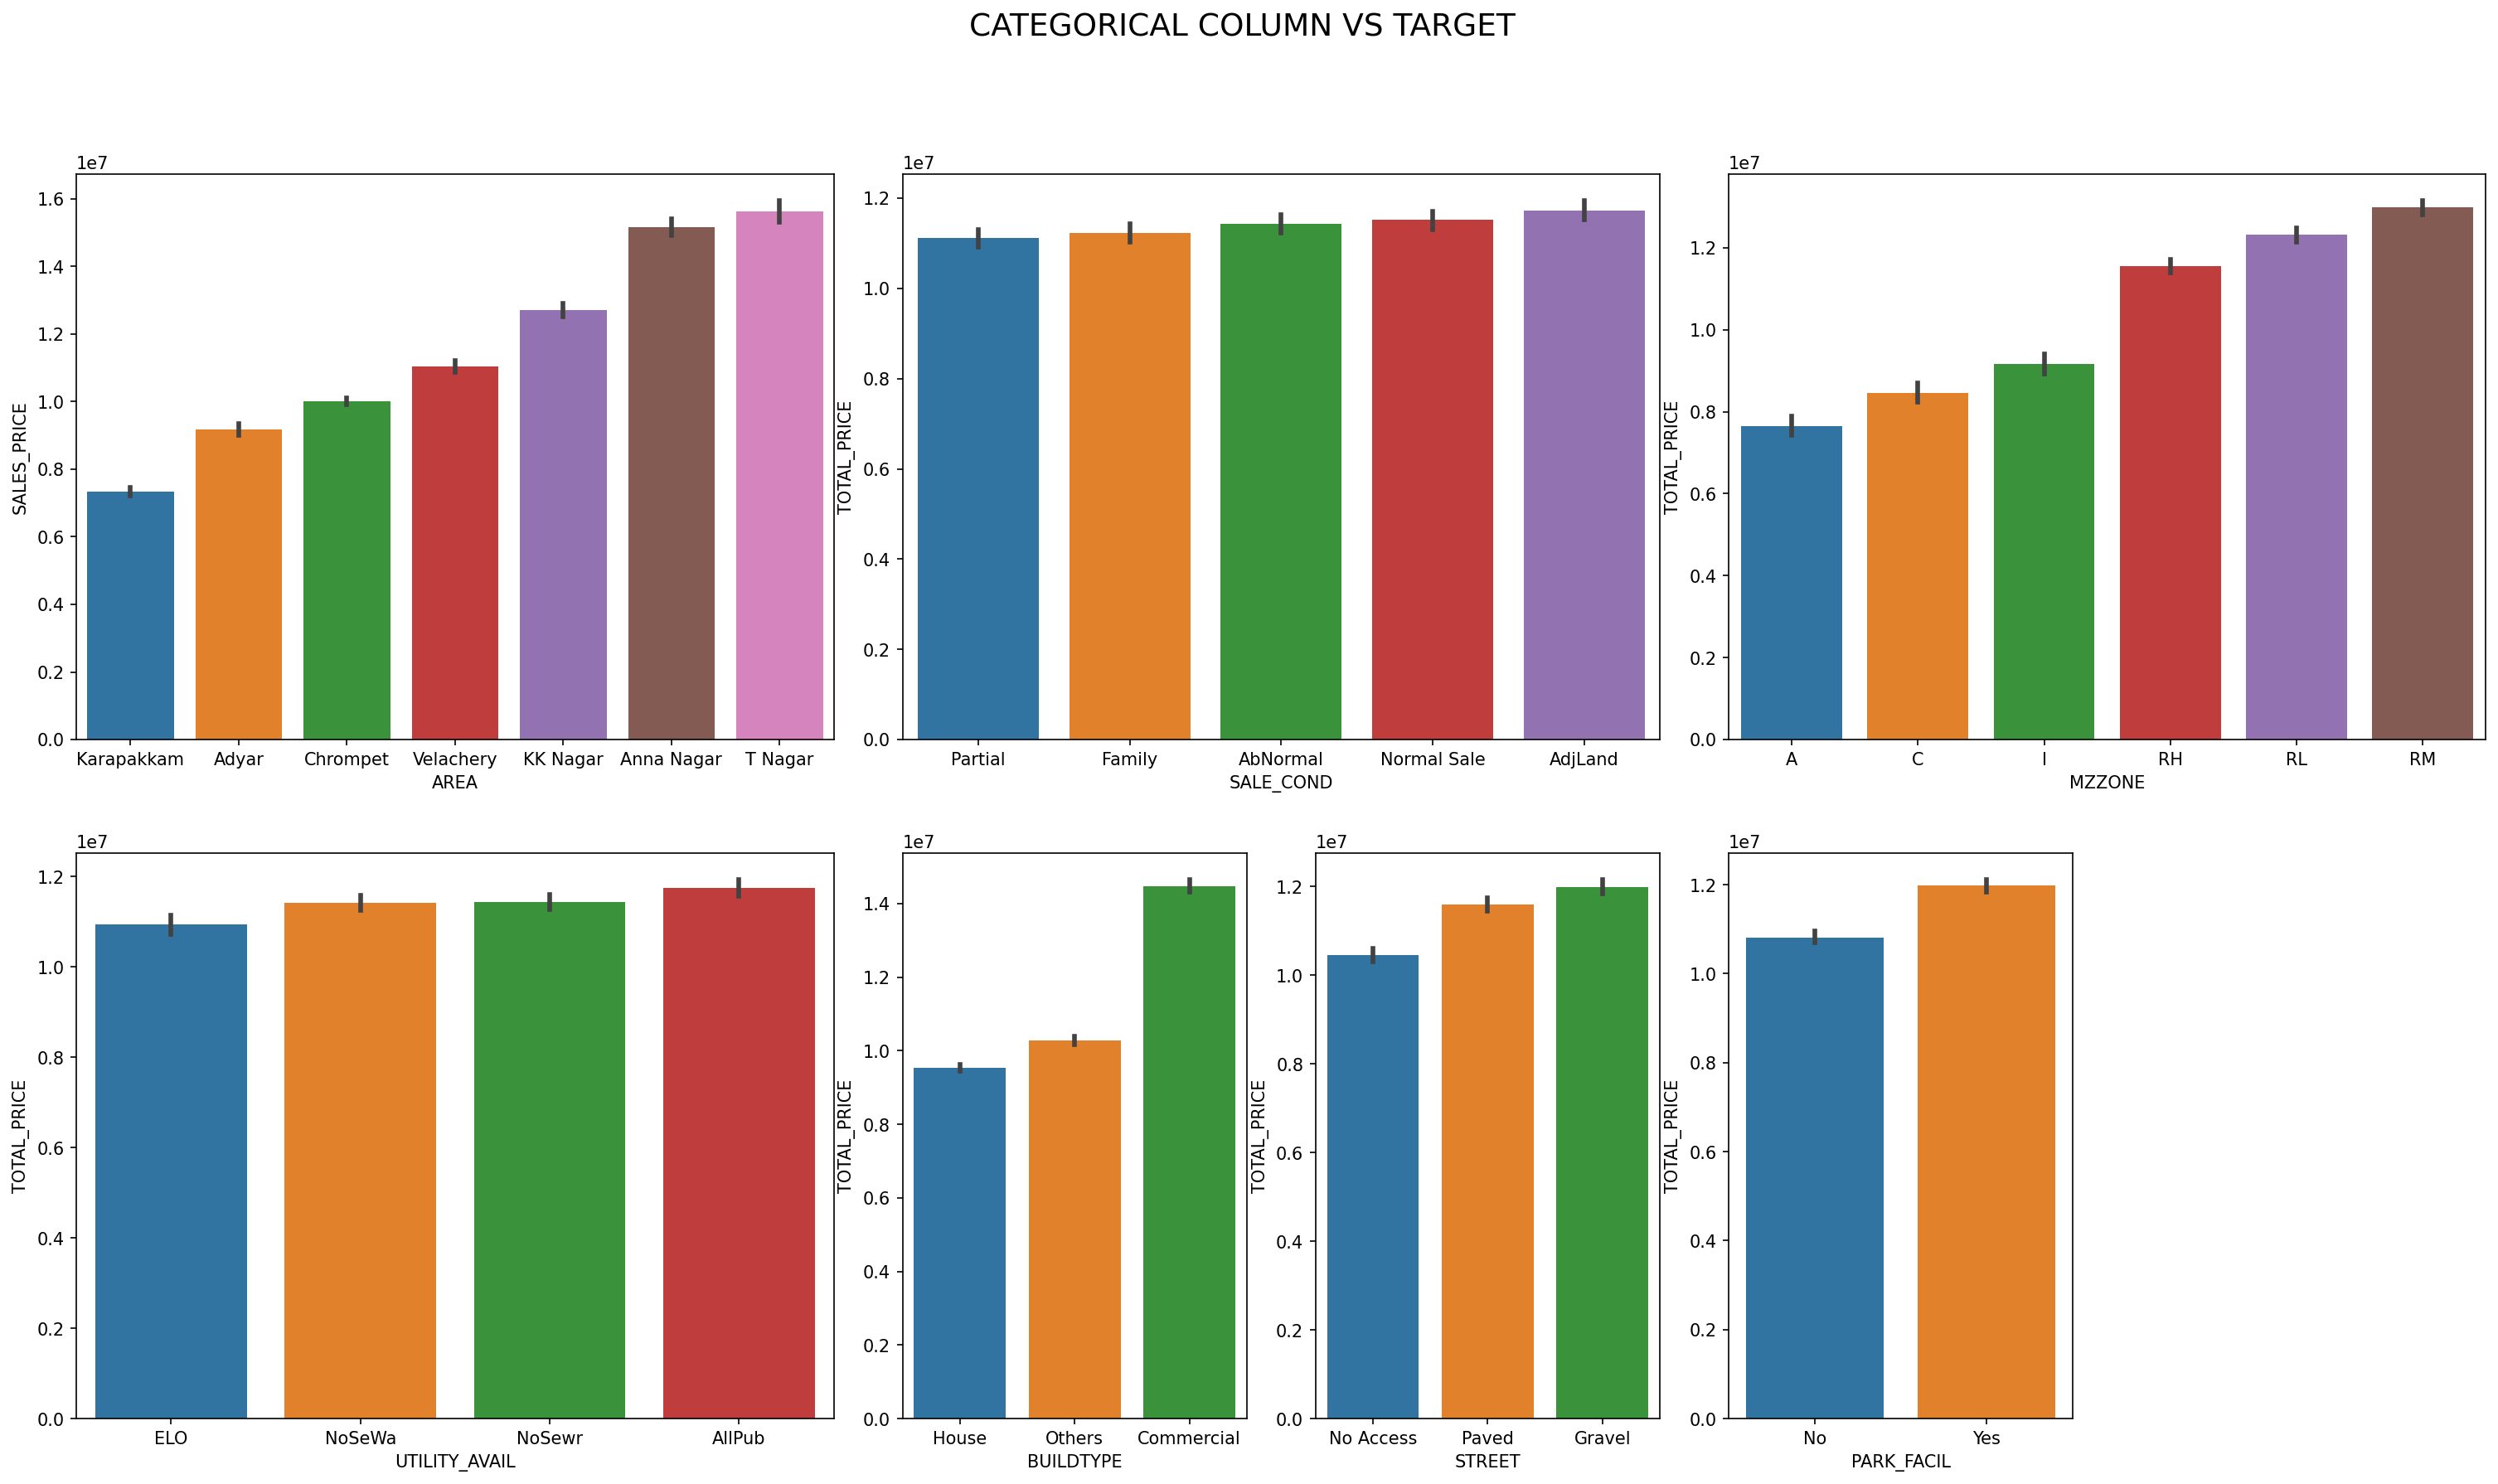

In [721]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df1["AREA"],y=df1["SALES_PRICE"],order= df1.groupby(["AREA"])["SALES_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df1["SALE_COND"],y=df1["TOTAL_PRICE"],order= df1.groupby(["SALE_COND"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df1["MZZONE"],y=df1["TOTAL_PRICE"],order= df1.groupby(["MZZONE"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df1["UTILITY_AVAIL"],y=df1["TOTAL_PRICE"],order= df1.groupby(["UTILITY_AVAIL"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df1["BUILDTYPE"],y=df1["TOTAL_PRICE"],order= df1.groupby(["BUILDTYPE"])["TOTAL_PRICE"].mean().sort_values().index)
plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df1["STREET"],y=df1["TOTAL_PRICE"],order= df1.groupby(["STREET"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df1["PARK_FACIL"],y=df1["TOTAL_PRICE"],order= df1.groupby(["PARK_FACIL"])["TOTAL_PRICE"].mean().sort_values().index)

plt.suptitle("CATEGORICAL COLUMN VS TARGET", fontsize=18)
plt.show()

In [722]:
# SUMMARY
# By referring the above plots we can make certain decisions
# 1. In area when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
# 2. In sale_cond when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
# 3.In mzzone when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
# 4. In utility_avain when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
# 5.In buildtype when we sort column in respect of total_price we didnt find linear relation in this categorical feature but it may be important for us so we will keep it and do OneHotEncoding on this column
# 6. In street when we sort column in respect of total_price we find good relation linearso we need the column and do label encoding.
# 7. In park_facil when we sort column in respect of total_price we find good relation so we need the column and do label encoding.

# Encoding

In [723]:
j=pd.get_dummies(df1.BUILDTYPE,prefix="buildtype")

In [724]:
df2=pd.concat([df1,j],axis=1)


In [725]:
#Encoding the area column order-wise 
df2.AREA = df2.AREA.map({'Karapakkam': 1,
                           'Adyar': 2, 
                           'Chrompet' : 3,
                           'Velachery' : 4,
                           'KK Nagar' : 5, 
                           'Anna Nagar' : 6,
                           'T Nagar' : 7})

# Encoding the sale_cond column order-wise 
df2.SALE_COND = df2.SALE_COND.map({'Partial' : 1, 
                                     'Family' : 2, 
                                     'AbNormal' : 3, 
                                     'Normal Sale' : 4,
                                     'AdjLand' : 5})

# Encoding the park_facil column order-wise 
df2.PARK_FACIL = df2.PARK_FACIL.map({'Yes':1,
                                       'No':0})

# Encoding the utility_avail column order-wise 
df2.UTILITY_AVAIL = df2.UTILITY_AVAIL.map({'ELO' : 1, 
                                             'NoSeWa' : 2,
                                             'NoSewr' : 3,
                                               'AllPub' : 4})
                                          
# Encoding the street column order-wise 
df2.STREET = df2.STREET.map({'No Access' : 1,
                               'Paved' : 2, 
                               'Gravel' : 3})


# Encoding the mzzone column order-wise 
df2.MZZONE = df2.MZZONE.map({'A' : 1,
                               'C' : 2,
                               'I' : 3,
                               'RL' : 5,
                               'RH' : 4,
                               'RM' : 6})

In [726]:
df2.head()

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,DATE_BUILD,DATE_SALE,PROPERTY_AGE,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,PRICE_PER_SQFT,SALES_PRICE,TOTAL_PRICE,buildtype_Commercial,buildtype_House,buildtype_Others
0,P03210,1,3,1,Commercial,4,2,1,1967-05-15,2011-05-04,44,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7569.72,7600000,8124400,1,0,0
1,P09411,6,3,0,Commercial,4,3,4,1995-12-22,2006-12-19,11,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,10935.43,21717770,22781941,1,0,0
2,P01812,2,3,1,Commercial,1,3,5,1992-02-09,2012-02-04,20,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,14476.57,13159200,13672408,1,0,0
3,P05346,4,2,0,Others,3,2,3,1988-03-18,2010-03-13,22,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,5191.53,9630290,10063653,0,0,1
4,P06210,1,3,1,Others,4,3,2,1979-10-13,2009-10-05,30,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,6040.99,7406250,7717313,0,0,1


In [727]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PRT_ID                7056 non-null   object        
 1   AREA                  7056 non-null   int64         
 2   SALE_COND             7056 non-null   int64         
 3   PARK_FACIL            7056 non-null   int64         
 4   BUILDTYPE             7056 non-null   object        
 5   UTILITY_AVAIL         7056 non-null   int64         
 6   STREET                7056 non-null   int64         
 7   MZZONE                7056 non-null   int64         
 8   DATE_BUILD            7056 non-null   datetime64[ns]
 9   DATE_SALE             7056 non-null   datetime64[ns]
 10  PROPERTY_AGE          7056 non-null   int64         
 11  INT_SQFT              7056 non-null   int64         
 12  DIST_MAINROAD         7056 non-null   int64         
 13  N_BEDROOM         

In [728]:
# By using pandas get_dummies func we created 3 dummy columns .
# In order to avoid dummy trap situation we need to drop any one of those columns

# outlier detection

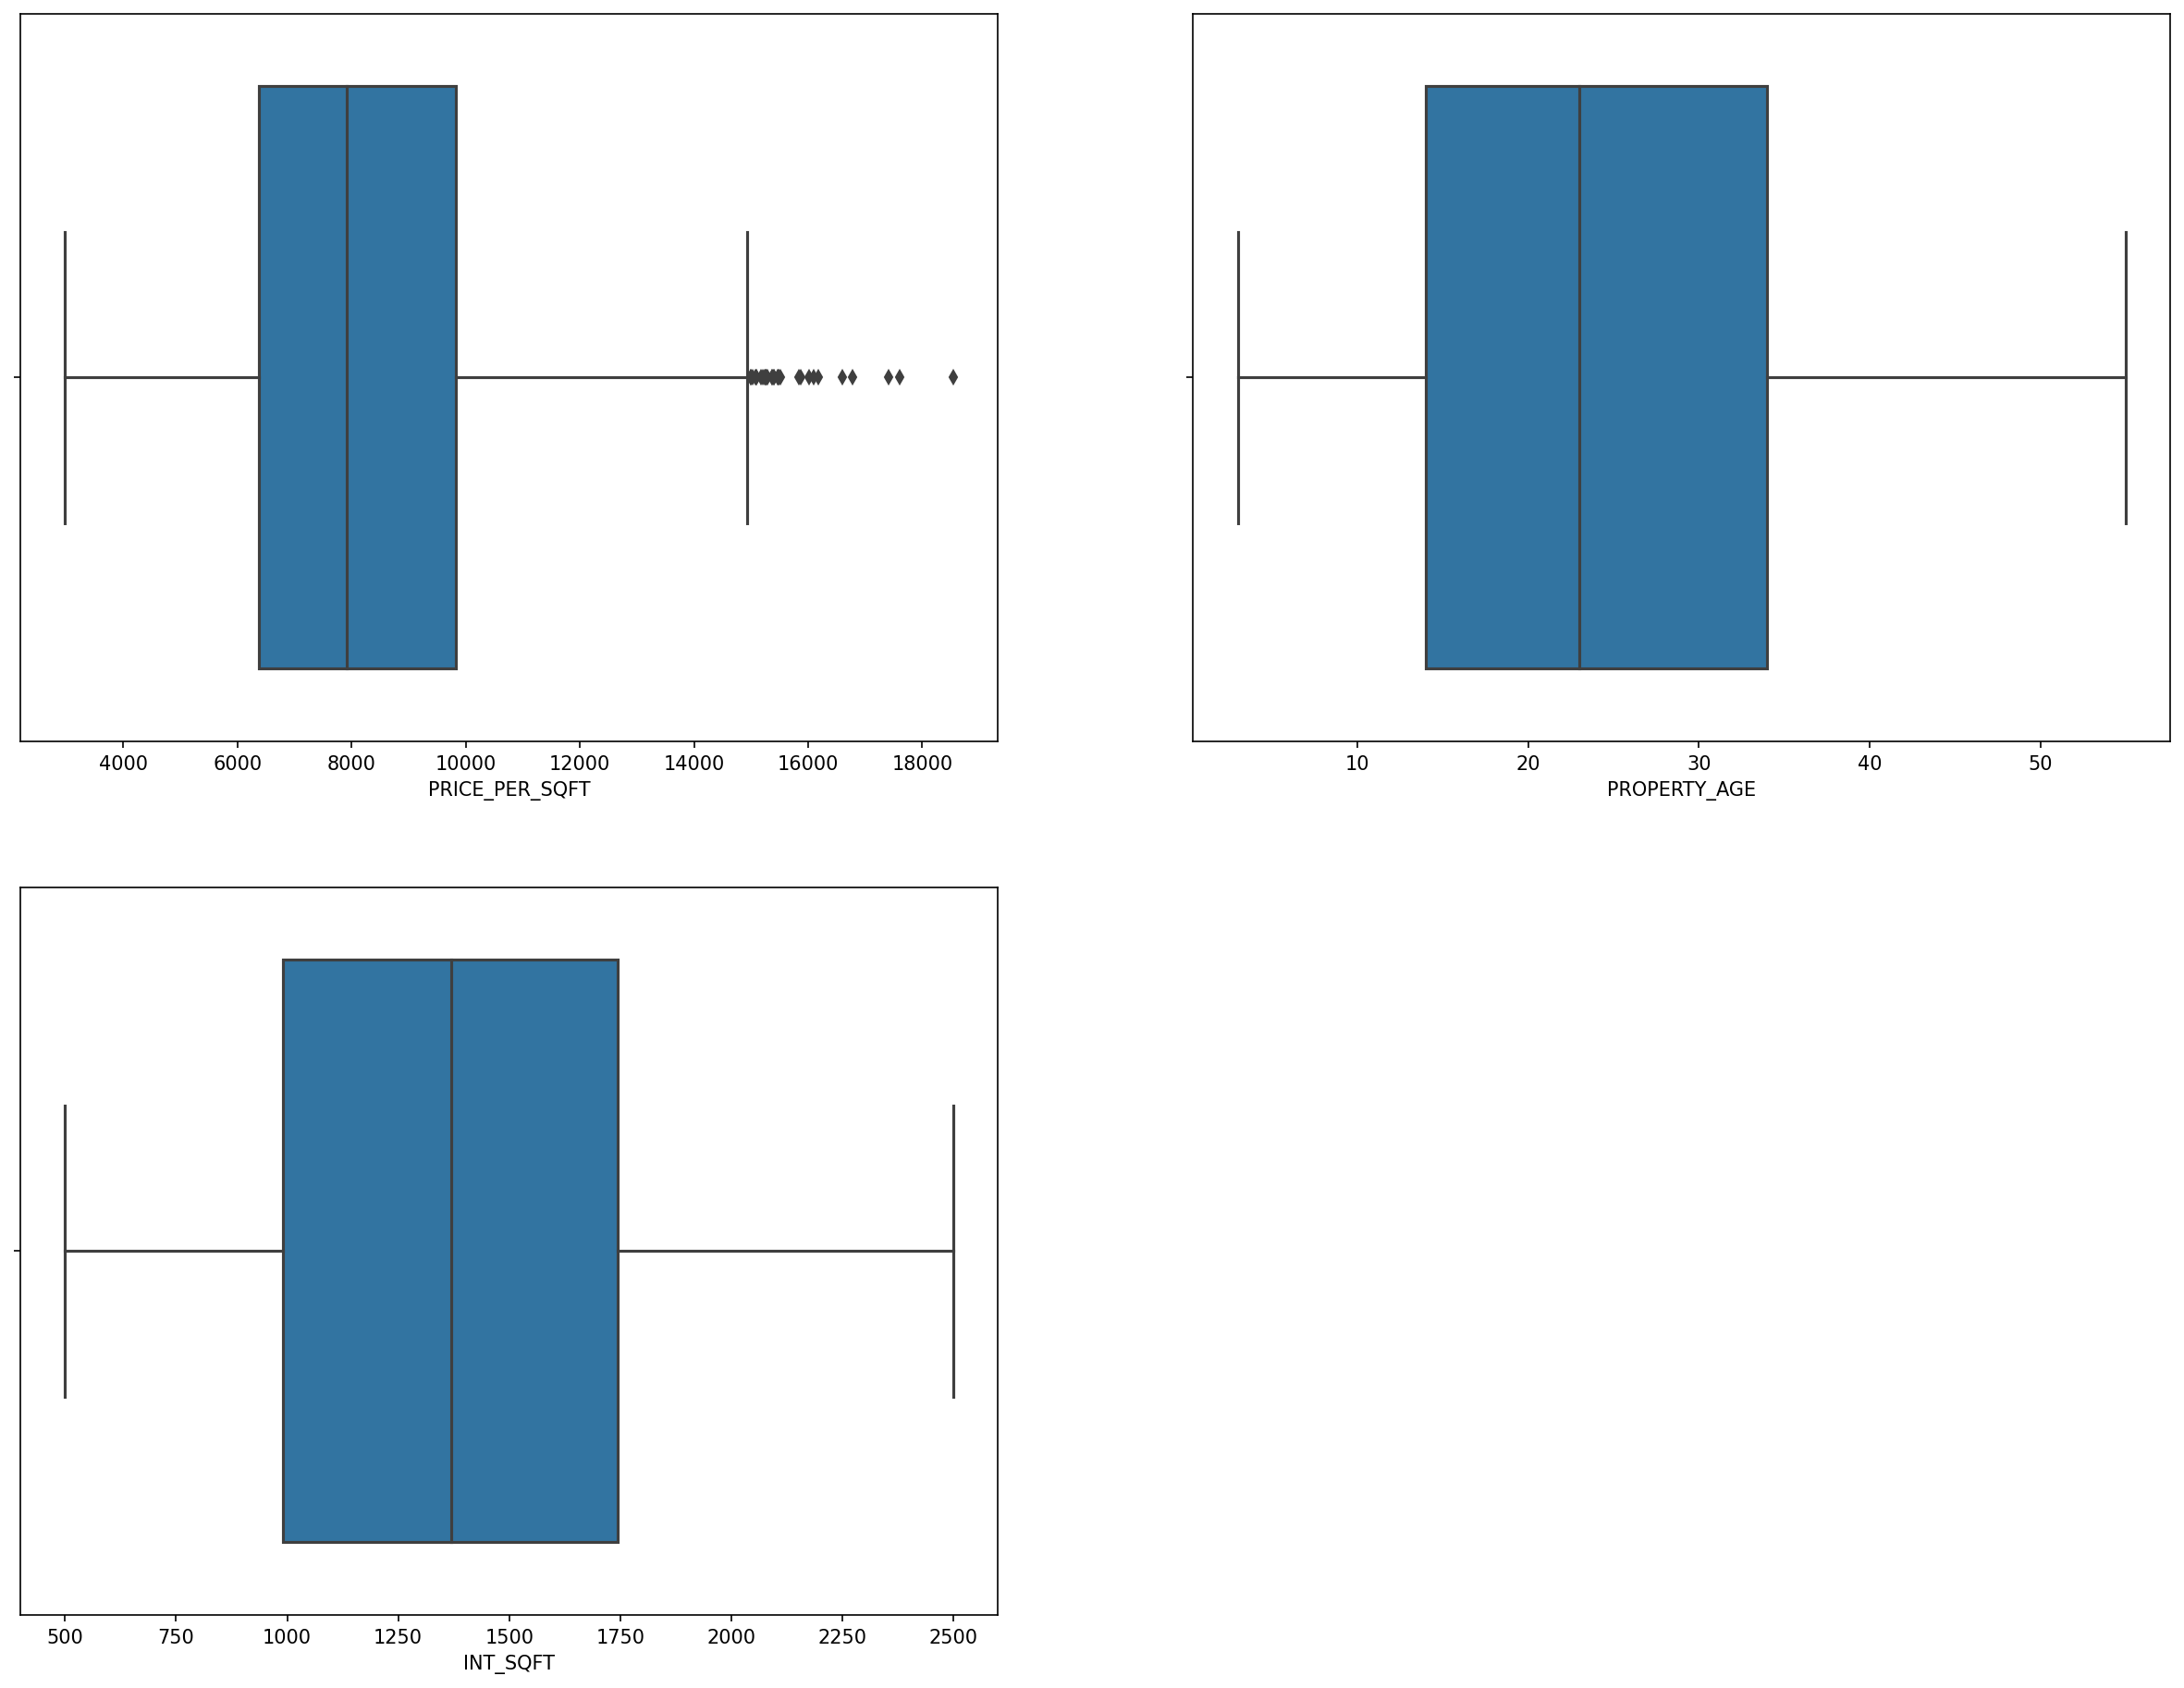

In [729]:
plt.figure(figsize=(20, 15), dpi=150)

plt.subplot(2,2,1)
sns.boxplot(df2.PRICE_PER_SQFT)

plt.subplot(2,2,2)
sns.boxplot(df2.PROPERTY_AGE)

plt.subplot(2,2,3)
sns.boxplot(df2.INT_SQFT)

plt.show()

In [730]:
# By using the box plot we found so many outliers in our PRICE_PER_SQFT column
# using IQR method to find upper,lower bound to transform outliers.

In [731]:
def find_limits(df,variable,distance):
    #lets calculate the boundaries outside which outliers present
    Q3=df2[variable].quantile(0.75)
    Q1=df2[variable].quantile(0.25)
    IQR=Q3-Q1
    
    l_bound=Q1 - (IQR*distance)
    u_bound=Q3+ (IQR*distance)
    
    return u_bound, l_bound

In [732]:
upper_bound,lower_bound=find_limits(df2,"PRICE_PER_SQFT",1.5)

In [733]:
print(upper_bound)
print(lower_bound)

14987.6475
1215.6275000000014


In [734]:
# Using capping technique we transform our outliers which are far away from our mainstrem of data.

In [735]:
df2["PRICE_PER_SQFT"]=np.where(df2["PRICE_PER_SQFT"] > upper_bound, upper_bound,
                              np.where(df2["PRICE_PER_SQFT"] < lower_bound, lower_bound, df2["PRICE_PER_SQFT"]))

In [736]:
# BY PLOTTING AN BOXPLOT AGAIN WE, CAN CLEARLY SEE HOW PERFECTLY WE TRANSFORMED THE OUTLIERS...

<AxesSubplot:xlabel='PRICE_PER_SQFT'>

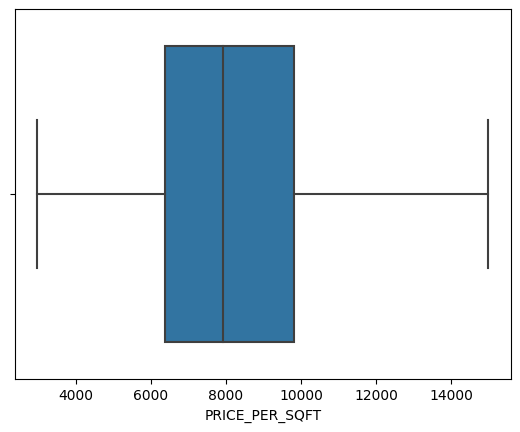

In [737]:
sns.boxplot(df2.PRICE_PER_SQFT)

# feature selection

In [738]:
def coorelation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
         if abs(corr_matrix.iloc[i,j])> threshold:
            colname=corr_matrix.columns[i]
            col_corr.add(colname)
    return col_corr

In [739]:
corr_features=coorelation(df2,0.9)
print(corr_features)

{'TOTAL_PRICE', 'N_ROOM'}


In [740]:
dropout=['PRT_ID', 'BUILDTYPE', 'DATE_BUILD','DATE_SALE', 'QS_BATHROOM', 'QS_ROOMS','QS_BEDROOM', 'QS_OVERALL','REG_FEE','N_ROOM','COMMIS','SALES_PRICE','DIST_MAINROAD','buildtype_Others']
df3=df2.drop(dropout, axis=1)

In [741]:
df3.head()

,AREA,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,PROPERTY_AGE,INT_SQFT,N_BEDROOM,N_BATHROOM,PRICE_PER_SQFT,TOTAL_PRICE,buildtype_Commercial,buildtype_House
0,1,3,1,4,2,1,44,1004,1,1,7569.72,8124400,1,0
1,6,3,0,4,3,4,11,1986,2,1,10935.43,22781941,1,0
2,2,3,1,1,3,5,20,909,1,1,14476.57,13672408,1,0
3,4,2,0,3,2,3,22,1855,3,2,5191.53,10063653,0,0
4,1,3,1,4,3,2,30,1226,1,1,6040.99,7717313,0,0


In [742]:
df3.columns=df3.columns.str.upper()

In [743]:
df3.columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'PROPERTY_AGE', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'PRICE_PER_SQFT',
       'TOTAL_PRICE', 'BUILDTYPE_COMMERCIAL', 'BUILDTYPE_HOUSE'],
      dtype='object')

In [744]:
U = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_House', 'utility_avail',
        'street', 'mzzone', 'property_age', 'int_sqft', 'n_bedroom',
        'n_bathroom',
         'price_per_sqft','total_price']

In [745]:
g = []
for i in U:
    o=i.upper()
    g.append(o)
g

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE_COMMERCIAL',
 'BUILDTYPE_HOUSE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'PROPERTY_AGE',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'PRICE_PER_SQFT',
 'TOTAL_PRICE']

In [746]:
df3 = df3.reindex(columns = g)

In [747]:
df3.head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,UTILITY_AVAIL,STREET,MZZONE,PROPERTY_AGE,INT_SQFT,N_BEDROOM,N_BATHROOM,PRICE_PER_SQFT,TOTAL_PRICE
0,1,3,1,1,0,4,2,1,44,1004,1,1,7569.72,8124400
1,6,3,0,1,0,4,3,4,11,1986,2,1,10935.43,22781941
2,2,3,1,1,0,1,3,5,20,909,1,1,14476.57,13672408
3,4,2,0,0,0,3,2,3,22,1855,3,2,5191.53,10063653
4,1,3,1,0,0,4,3,2,30,1226,1,1,6040.99,7717313


In [748]:
df3.isna().sum()

AREA                    0
SALE_COND               0
PARK_FACIL              0
BUILDTYPE_COMMERCIAL    0
BUILDTYPE_HOUSE         0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
PROPERTY_AGE            0
INT_SQFT                0
N_BEDROOM               0
N_BATHROOM              0
PRICE_PER_SQFT          0
TOTAL_PRICE             0
dtype: int64

In [749]:
final_df=df3.copy()

# Splitting the data

In [752]:
x=df3.drop("TOTAL_PRICE",axis=1)
y=df3["TOTAL_PRICE"]

In [755]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [756]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [758]:
x_train.head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,UTILITY_AVAIL,STREET,MZZONE,PROPERTY_AGE,INT_SQFT,N_BEDROOM,N_BATHROOM,PRICE_PER_SQFT
6027,4,4,0,0,0,1,2,2,53,1587,2,1,4599.63
4262,1,5,0,0,1,2,3,2,14,1266,1,1,5137.05
1763,3,1,0,1,0,3,3,4,30,816,1,1,12264.83
3946,3,1,1,0,1,4,2,6,28,1142,1,1,8814.01
4249,2,4,0,0,1,2,3,6,27,1238,2,2,8583.45


In [759]:
y_train.head()

6027     7708388
4262     6822172
1763    10478481
3946    10357503
4249    10966346
Name: TOTAL_PRICE, dtype: int64

In [785]:
x_test.head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,UTILITY_AVAIL,STREET,MZZONE,PROPERTY_AGE,INT_SQFT,N_BEDROOM,N_BATHROOM,PRICE_PER_SQFT
1869,4,1,1,1,0,3,1,4,28,1971,3,2,7894.32
5605,4,3,1,0,1,1,2,6,36,1751,2,1,6141.47
6844,6,1,1,0,0,1,1,4,16,1911,2,1,7002.80
998,1,2,0,0,0,4,1,5,16,1497,2,2,5454.16
6861,1,3,0,0,1,3,3,4,6,1071,1,1,6658.26


In [786]:
y_test.head()

1869    16337696
5605    11173115
6844    13850732
998      8581284
6861     7537467
Name: TOTAL_PRICE, dtype: int64

# model building

In [776]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [777]:
dist={'n_estimators': [110,150,180,210,250,280,310,350],
     'max_depth': [5,8,10,13,16,21,23,25]}

In [778]:
 from sklearn.model_selection import RandomizedSearchCV

# hyper-parameter tuning using randomsearchcv

In [779]:
model=RandomizedSearchCV(estimator=rf,param_distributions=dist,n_iter=20,random_state=42)
model.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [5, 8, 10, 13, 16, 21, 23,
                                                      25],
                                        'n_estimators': [110, 150, 180, 210,
                                                         250, 280, 310, 350]},
                   random_state=42)

In [780]:
y_pred=model.predict(x_test)

In [783]:
# accuracy
print(r2_score(y_test,y_pred))

0.9952072314794936


In [782]:
# best parameter obtained from hyper tuning the mpodel
model.best_params_

{'n_estimators': 280, 'max_depth': 25}

In [789]:
s=model.predict([[4,1,1,1,0,3,1,4,28,1971,3,2,7894.32]])

In [791]:
print(s[0])

16098371.907142857


In [790]:
print(round(s[0]))

16098372


# dumping the model

In [784]:
import pickle

In [792]:
filename="House_price_prediction.sav"
pickle.dump(model,open(filename,"wb"))